## EDA

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import bs4
from bs4 import BeautifulSoup
import scipy as sc

import requests

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings

import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
himovies_df=pd.read_csv('data\Clean_df.csv')
himovies_df

,movie_name,release_year,imdb_grades,genres,casts,duration in min,country,production
0,Operation Mincemeat,2022,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128,UnitedKingdom,"ArcheryPictures,AFilmLocationCompany,CohenMedi..."
1,Memory,2022,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF..."
2,Stanleyville,2021,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88,Canada,"ScythiaFilms,Anthropoid"
3,Scarborough,2021,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136,Canada,"CompyFilms,levelFILM"
4,It's Hard But It's Fair,2022,5.6,Drama,"Osaze'Agod'Niamke,Derrick'Deuce'Keys,Moonrise'...",74,UnitedStatesofAmerica,MemphvilleManagementandDistribution
...,...,...,...,...,...,...,...,...
29372,The Shooting,1966,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions"
29373,The Con Artists,2014,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116,SouthKorea,LotteEntertainment
29374,And There Were 4,2018,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83,UnitedStatesofAmerica,XXX
29375,From Time to Time,2009,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95,UnitedKingdom,"LionheadStudios,EalingStudios"


## We decided to split the genres to get a better perspective on each film

In [4]:
for idx,row in enumerate (himovies_df['genres']):
    himovies_df['genres'].at[idx] = row.split(",")[0]        

himovies_df = himovies_df[himovies_df["genres"].str.contains("TVMovie") == False]

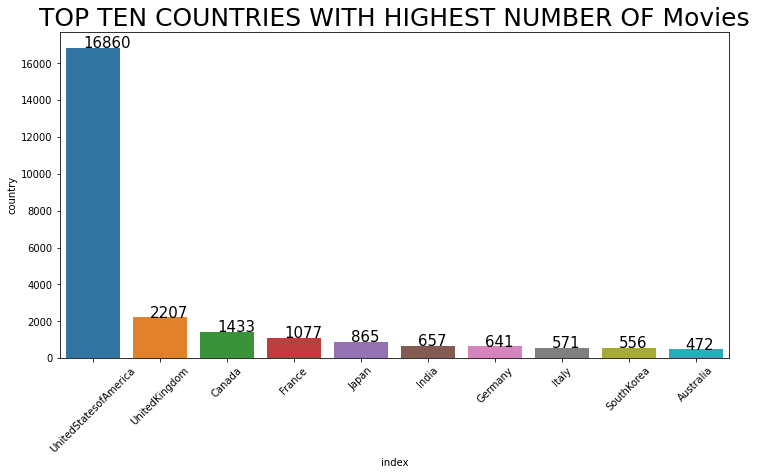

In [5]:
m=himovies_df["country"]
movies=m.value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF Movies",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

### America is the country that produces the most films, by a large margin from the other countries.
### In the other countries, we see that the number of movies homogeneous.

Text(0, 0.5, 'Frequency')

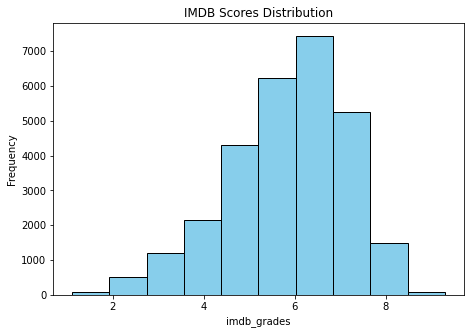

In [6]:
fig = plt.figure(figsize=(25, 5))
fig1 = fig.add_subplot(1,3,1)

fig1.hist(himovies_df.imdb_grades,color="skyblue",edgecolor='black')
fig1.set_title('IMDB Scores Distribution')
fig1.set_xlabel("imdb_grades")
fig1.set_ylabel("Frequency")

### This histogram shows us that most of the films’ IMDB scores lie between around 5.5–7.5

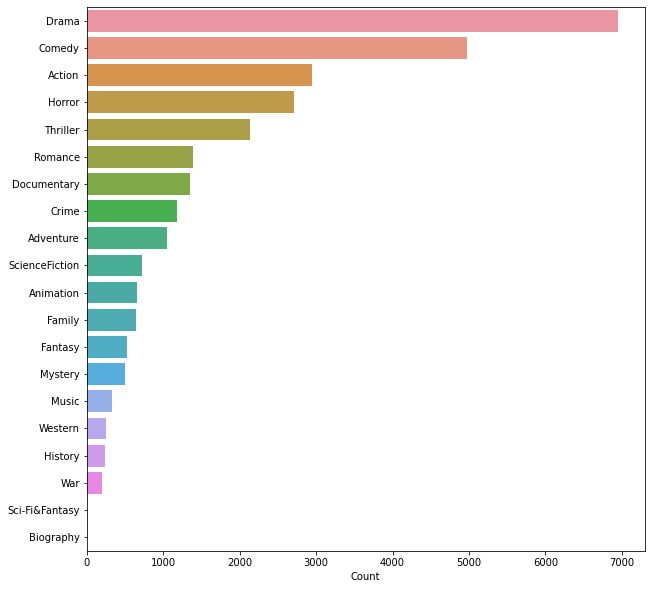

In [7]:
# drawing the bar plot for the genre column
# grouping the dataframe by "genre" column and then counting each category and displaying first 30 genres with largest count
y=himovies_df.groupby("genres")['genres'].count().nlargest(20)
y
x = y.index #the index(row labels) of the dataframe
 
plt.figure(figsize=(10,10)) # setting the plot figure size
ax = sns.barplot(x= y, y = x) # using the seaborn's barplot method
ax.set(xlabel = 'Count') 
ax.set(ylabel = '') 

plt.show() # displaying the plot

### From this, we can see that most of our data is about the drama genre

In [8]:
genre_filter=himovies_df['genres'].value_counts().loc[lambda x: x>300].to_frame()
genre_filter

,genres
Drama,6951
Comedy,4973
Action,2952
Horror,2709
Thriller,2131
Romance,1386
Documentary,1349
Crime,1175
Adventure,1052
ScienceFiction,718


### Since there have been many movies with different genres over the years, we’ll only analyze a few of the common genres from 2010 onwards

In [9]:
temp_df = himovies_df[himovies_df["genres"].str.contains("Drama|Comedy|Action|Horror|Thriller|Romance|Documentary|Adventure" ) == True]
temp_df = temp_df[temp_df['release_year']>=2010]

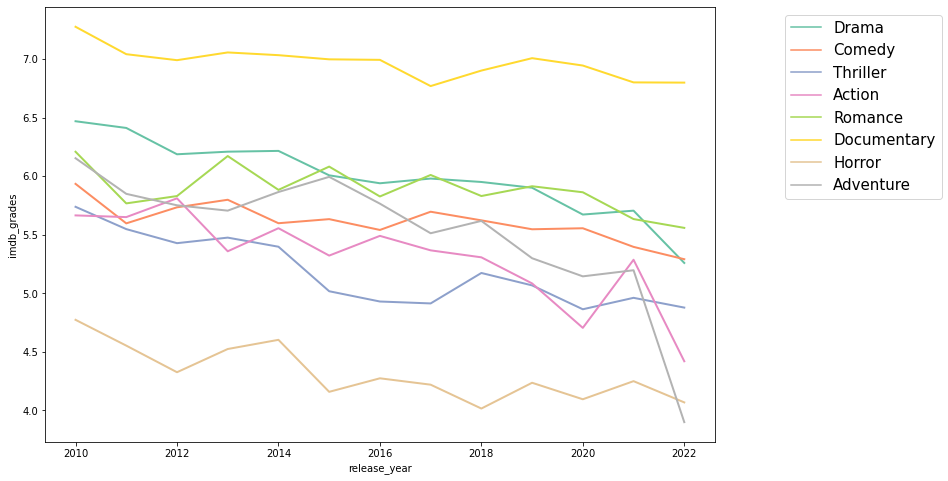

In [10]:
# plotting the genre_filter in a line plot along with the years 
g=sns.lineplot(data=temp_df, x=temp_df["release_year"], y=temp_df['imdb_grades'], hue=temp_df["genres"], ci=None,linewidth = 2, palette="Set2")
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(12, 8)

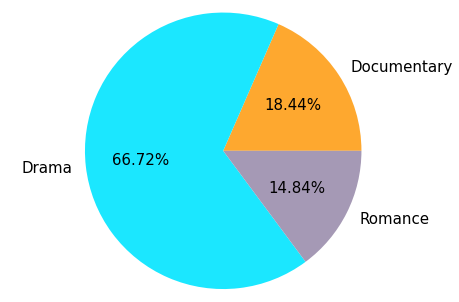

In [11]:
#storing the top 3 genres since 2010 with highest IMDB scores in a list 
list_of_genre= ["Documentary", "Drama", "Romance"] 

genre_list_count=[]
for i in range(0,3):
    genre_count=len(temp_df[temp_df['genres'] == list_of_genre[i]])

    genre_list_count.append(genre_count) # appending the total count of each genre in the list

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colorss = ['#FEA82F','#1BE7FF','#A599B5']
ax.pie(genre_list_count, labels = list_of_genre,autopct='%1.2f%%', colors=colorss, wedgeprops = {'linewidth': 3}, radius=1.2, textprops = {"fontsize":15})
plt.show()

### In the lineplot graph, we can see that the Documentary genre leads in its IMDB score over the years since 2010, followed by the category of drama and finally the category of romance.

### The Pie graph shows the percentage amount of movies in the top genres above.

# Correlation - Two dimensional visualization

## Cross tabulation

In [12]:
# sns.regplot(x=himovies_df["release_year"], y=himovies_df["imdb_grades"])

In [13]:
ct1 = pd.crosstab(himovies_df['imdb_grades'], himovies_df['genres'], normalize='index') 
ct1.head()

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi&Fantasy,ScienceFiction,Thriller,War,Western
imdb_grades,,,,,,,,,,,,,,,,,,,,
1.1,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000
1.2,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.500000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000
1.3,0.666667,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1.4,0.166667,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000
1.5,0.111111,0.111111,0.000000,0.0,0.111111,0.0,0.111111,0.000000,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.111111


Text(0, 0.5, 'Relative frequency')

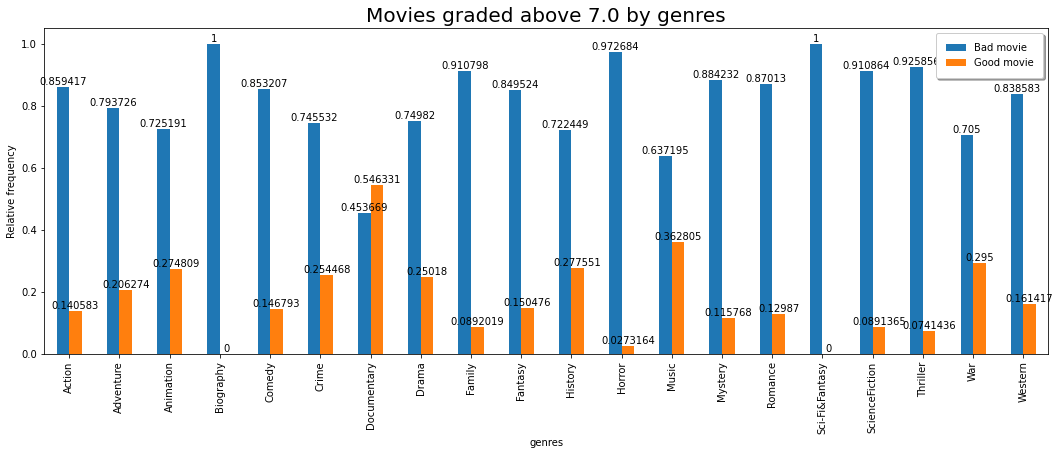

In [14]:
ct = pd.crosstab(himovies_df['genres'],(himovies_df['imdb_grades'] > 7) ,normalize="index")#.sort_values(by = 'imdb_grades', ascending=False)

ax = ct.plot(kind="bar", figsize=(18,6))
ax.legend(["Bad movie", "Good movie"],fancybox=True, framealpha=1, shadow=True, borderpad=1)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Movies graded above 7.0 by genres", fontsize = 20)
plt.ylabel("Relative frequency")


In [15]:
himovies_df.corr()

,release_year,imdb_grades,duration in min
release_year,1.000000,-0.302516,-0.086497
imdb_grades,-0.302516,1.000000,0.348907
duration in min,-0.086497,0.348907,1.000000


In [16]:
corr = himovies_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [ ]:
print(himovies_df['imdb_grades'].corr(himovies_df['release_year']))

-0.30251617846214846


In [ ]:
print(himovies_df['imdb_grades'].corr(himovies_df['duration in min']))

0.3489066602955932
